# CSE5311: Numerical Methods for Data Analytics
## Homework 1
### Linear Algebra Review

Import any necessary libraries.  Remember to put in the magic line to get the plots to show up right in the notebook.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

## Vectors
Define the following three vectors as numpy arrays:
$u = [2,5,0,4,8]$,
$v = [0,-3,2,-1,1]$,
$w = [1,-1,0,0,7]$

In [2]:
# Insert code here

# Establish the vectors u, v and w
u = np.array([2,5,0,4,8])
v = np.array([0,-3,2,-1,1])
w = np.array([1,-1,0,0,7])

# Throw a test variable to check transpose.
# uu = np.array([[2,4],[5,3]])
# print(uu)
# print(uu.T)

# Print the variables
print('The variable u: ',u)
print('The variable v: ',v)
print('The variable w: ',w)

The variable u:  [2 5 0 4 8]
The variable v:  [ 0 -3  2 -1  1]
The variable w:  [ 1 -1  0  0  7]


Calculate the following: <br>
(a) $u^Tv = u \cdot v$ <br>
(b) $(u \cdot v)w$ <br>
(c) $ \cos(\theta) = \frac{u \cdot v}{\|u\| \|v\|}$ Note: Have your code calculate the value of $\theta$ in radians (defalut)

In [3]:
# Insert code for (a) here
# u_tv = u.T * v # element wise
u_tv = np.dot(u,v)
print("The value of the dot product of a) u^T . v: ", u_tv)

The value of the dot product of a) u^T . v:  -11


In [4]:
# Insert code for (b) here
# From the previous part, one found the value of u^T.v = u.v so therefore (u.v)*w will use the previous section.
uvw = u_tv * w
print("The result of the dot product of b) (u.v)w: ", uvw)

The result of the dot product of b) (u.v)w:  [-11  11   0   0 -77]


In [6]:
# Insert code for (c) here
# Create a variable for the magnitude of u multiplied by the magnitude of v
mag_uv = np.linalg.norm(u) * np.linalg.norm(v)
theta = math.acos(u_tv * (1/mag_uv))
print("The angle for c):{} degrees".format(theta))

The angle for c):1.8463093542573732 degrees


## Projections
Create the projection matrix to project the vector $u=[1,1,1]$ onto the vector $e=[1,0,0]$.  Explicitly print out the projection matrix's size and elements.

In [9]:
# Insert code to create the projection matrix and print its contents and size.
e = np.array([1,0,0])
u_1 = np.array([1,1,1])

print(u_1[0].dtype)

# A problem occurred that e.e^T was not giving me a matrix, so I decided to use the numpy matrix function to fix it.
E = np.matrix(e)
e_et = E.T*E

et_e = np.dot(e.T,e)
# The following comments below were for testing.
#et_e = E*E.T
#print(et_e)
#print(e_et)
#print(E.T)
#print(E)

# Equation for Projection matrix, P, is P = (e*e^T)/(e^T*e)
# Calculating the Projection matrix, P, and display its dimensions.
P = e_et / et_e
print('Projection Matrix: \n', P)
print('Size of P: ',P.shape)

int32
Projection Matrix: 
 [[ 1.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
Size of P:  (3, 3)


Now project the same vector $u$ onto the subspace defined by the following two vectors: $e_1=[1,0,0]$ and $e_2=[0,1,0]$.  Create the projection matrix and explicitly print out its size and elements.

In [27]:
# Insert code to create the projection matrix and print its contents and size.
e_12 = np.array([[1,0],[0,1],[0,0]])
# print(e_12)
e_12dot = np.dot(e_12.T,e_12)
# print(e_12dot)

inv_e12dot = np.linalg.inv(e_12dot)
# print(inv_e12dot)
inv_e12dot_trans = np.dot(inv_e12dot,e_12.T)
#print(inv_e12dot_trans)
# The projection matrix, P, is given by X*(X^T*X)^-1*X^T.
P_mat = np.dot(e_12,inv_e12dot_trans)
print('P_mat:\n ', P_mat)
print('P_mat shape: ',P_mat.shape)
# print(inv_e12dot_trans)

# The projected matrix is P*b
Pb1 = np.dot(P_mat,e_12[:,0])
Pb2 = np.dot(P_mat,e_12[:,1])
print(Pb1)
print(Pb2)


P_mat:
  [[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  0.]]
P_mat shape:  (3, 3)
[ 1.  0.  0.]
[ 0.  1.  0.]


Using python's visualization capabilities, make a visualization illustrating the projection.  Something like this one:
<img src="Figures/vectorProj.png" height="180" width="180">

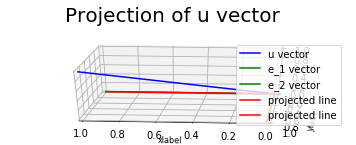

In [10]:
# Insert code for 3D visualization of projection.
# The scalar, x, can be represented as (A^T*A)^-1*A^T*b where A = e_12 and b = u.
# x = np.dot(inv_e12dot_trans,u)
# print(x)
# print('u:',u)
# Since x is a matrix [1 1]. So the projection onto e1 and e2 would be just be the plane spanned by e1 and e2.

# Plot the lines and labeled them
fig = plt.figure()
ax = fig.add_subplot(2,1,1, projection='3d')
fig.suptitle('Projection of u vector', fontsize=20)
ax.plot([0,1], [0,1], [0,1],'b', label='u vector')
ax.plot([0,1], [0,0], [0,0],'g', label='e_1 vector')
ax.plot([0,0], [0,1], [0,0],'g', label='e_2 vector')
ax.plot([0,1], [0,0], [0,0],'r', label='projected line')
ax.plot([0,0], [0,1], [0,0],'r', label='projected line')


# Set the limits of the axes, Name the axes
ax.set_xlim3d(0,1)
ax.set_ylim3d(0,1)
ax.set_zlim3d(0,1)

plt.xlabel('xlabel', fontsize=8)
plt.ylabel('ylabel', fontsize=8)

ax.legend(loc='right')

ax.view_init(azim = 95) 

plt.show()



## Eigenvalues and Eigenvectors
Obtain the eigenvalues and eigenvectors of this matrix:
$$A = \begin{bmatrix}
    3    &   2 & 4 \\
    2    &   0 & 2 \\
    4    &   2 & 3
\end{bmatrix}$$

In [13]:
# Define A and print it.
A = np.array([[3,2,4],[2,0,2],[4,2,3]])
print('Matrix A:\n',A)

Matrix A:
 [[3 2 4]
 [2 0 2]
 [4 2 3]]


In [14]:
# Compute eignevectors and eigenvalues.
eigVal_A,eigVec_A = np.linalg.eig(A)
print('Eigenvalues of A: ',eigVal_A)
print('Eigenvectors of A:\n ',eigVec_A)

Eigenvalues of A:  [-1.  8. -1.]
Eigenvectors of A:
  [[-0.74535599  0.66666667 -0.20756326]
 [ 0.2981424   0.33333333 -0.77602137]
 [ 0.59628479  0.66666667  0.59557394]]


Provide a brief description on the relationship between $A$ and resulting eigenvectors.  If you make a claim about the eigenvectors, illustrate the property numerically.

The relationship of a square matrix with its eigenvectors is that a matrix $A$, in this case, can be decomposed into its eigenvalues and eigenvectors. The linear combination of the matrix $A$ and one of its eigenvectors is equal to the linear combination of its eigenvalue and eigenvector.

In [15]:
# Any supporting code for above question.
# Going to prove the relationship for eigenvectors of A is equal to product of eigenvalues and eigenvectors.
print('A*x = lambda * x')
stp1 = np.dot(A,eigVec_A[:,1])
print('stp1:',stp1)
stp2 = np.dot(eigVal_A[1],eigVec_A[:,1])
print('stp2:',stp2)

A*x = lambda * x
stp1: [ 5.33333333  2.66666667  5.33333333]
stp2: [ 5.33333333  2.66666667  5.33333333]


Create a projection matrix that projects some random data from 2D, i.e. $\mathbb{R}^2$, to the subspace spanned by the eigenvector associated with largest eigenvalue.  You will need to look up how to create some random points in 2D.  

In [16]:
# Create random points in 2D.
data_rand = np.random.rand(3,2)
print('data_rand: \n',data_rand)

data_rand: 
 [[ 0.56893926  0.54379373]
 [ 0.98601895  0.09117001]
 [ 0.71110284  0.59710459]]


In [17]:
# Setup projection matrix and project the data.
# print('data_rand: ', data_rand)

# Given the eigenvector associated with the largest eigenvalue
large_eigenval = max(eigVal_A)
print('Largest Eigenvalue:', large_eigenval)

# The largest eigenvalue of 8 is associated with the eigenvector in column 2.
# Calculate the projection matrix
eigenVec_A = np.matrix(eigVec_A[:,1])
print(eigenVec_A.shape)
print(eigenVec_A[0,0])
e_vecAdotT = eigenVec_A*eigenVec_A.T
print('Eigenvector: ', eigenVec_A)
print('e_vecAdotT: ', e_vecAdotT)

Pmatrix = eigenVec_A.T*eigenVec_A/e_vecAdotT
print('Projection Matrix: \n',Pmatrix)

# Calculate the projected data.
projected_data = Pmatrix*data_rand
print('This is the projected data: \n', projected_data)

Largest Eigenvalue: 8.0
(1, 3)
0.666666666667
Eigenvector:  [[ 0.66666667  0.33333333  0.66666667]]
e_vecAdotT:  [[ 1.]]
Projection Matrix: 
 [[ 0.44444444  0.22222222  0.44444444]
 [ 0.22222222  0.11111111  0.22222222]
 [ 0.44444444  0.22222222  0.44444444]]
This is the projected data: 
 [[ 0.78802292  0.52732592]
 [ 0.39401146  0.26366296]
 [ 0.78802292  0.52732592]]


Now create visualization that shows the original 2D data, the eigenvector, and all the projected data on the eigenvector subspace (i.e. a line).

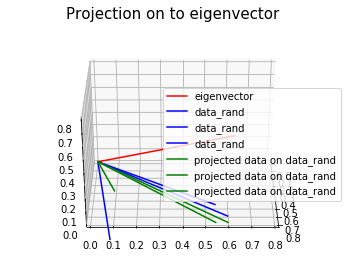

In [18]:
# Plot visualization.
fig1 = plt.figure()
ax1 = fig1.gca(projection='3d')

fig1.suptitle('Projection on to eigenvector', fontsize=15)

ax1.plot([0,eigVec_A[0,0]],[0,eigVec_A[0,1]],[0,eigVec_A[0,2]],'r',label='eigenvector')
ax1.plot([0,data_rand[0,0]],[0,data_rand[0,1]],[0,0],'b',label='data_rand')
ax1.plot([0,data_rand[1,0]],[0,data_rand[1,1]],[0,0],'b',label='data_rand')
ax1.plot([0,data_rand[2,0]],[0,data_rand[2,1]],[0,0],'b',label='data_rand')
ax1.plot([0,projected_data[0,0]],[0,data_rand[0,1]],[0,0],'g',label='projected data on data_rand')
ax1.plot([0,projected_data[1,0]],[0,data_rand[1,1]],[0,0],'g',label='projected data on data_rand')
ax1.plot([0,projected_data[2,0]],[0,data_rand[2,1]],[0,0],'g',label='projected data on data_rand')

ax1.set_xlim3d(0,0.8)
ax1.set_ylim3d(0,0.8)
ax1.set_zlim3d(0,0.8)

ax1.legend(loc='right')
ax1.view_init(azim = 0)
plt.show()

